In [1]:
import pandas as pd
import numpy as np
import pickle

from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from IPython.display import HTML

In [2]:
import os

os.chdir("D:/Last_attempt/")

In [3]:
df = pd.read_csv("D:/Last_attempt/proximity_data.csv")
df.head()

,experiment,duration,seeder,Cap2,time_between_0.05_and_0.5m,time_between_0.5_and_1m,time_between_1_and_2m,time_above_2m,infected
0,1,1,436,100,2.783333,10.600000,23.483333,25.850000,0
1,1,1,436,116,4.500000,20.983333,23.216667,13.916667,0
2,1,1,436,255,6.200000,20.900000,27.200000,8.416667,0
3,1,1,436,449,17.016667,20.733333,15.933333,9.050000,0
4,1,1,436,3008,0.183333,1.033333,9.700000,51.816667,0


In [4]:
df = df.rename(columns={'time_between_0.05_and_0.5m': 't1',
                        'time_between_0.5_and_1m': 't2',
                        'time_between_1_and_2m': 't3',
                        'time_above_2m': 't4'})

df.head()

,experiment,duration,seeder,Cap2,t1,t2,t3,t4,infected
0,1,1,436,100,2.783333,10.600000,23.483333,25.850000,0
1,1,1,436,116,4.500000,20.983333,23.216667,13.916667,0
2,1,1,436,255,6.200000,20.900000,27.200000,8.416667,0
3,1,1,436,449,17.016667,20.733333,15.933333,9.050000,0
4,1,1,436,3008,0.183333,1.033333,9.700000,51.816667,0


In [5]:
# Convert experiment, duration, seeder, and Cap2 to categorical data types
df['experiment'] = df['experiment'].astype('category')
df['duration'] = df['duration'].astype('category')
df['seeder'] = df['seeder'].astype('category')
df['Cap2'] = df['Cap2'].astype('category')
df['infected'] = df['infected'].astype('category')

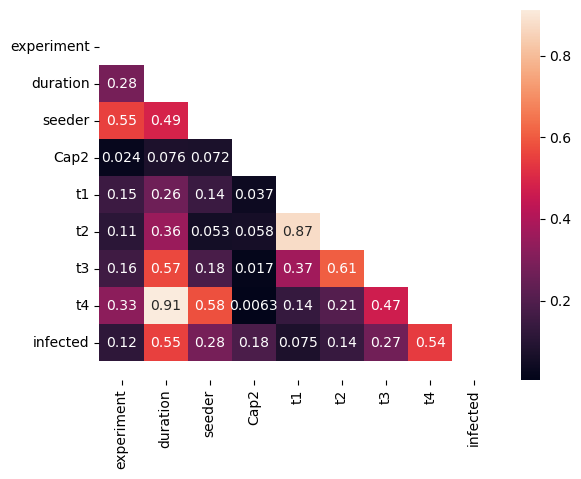

In [7]:
plt.figure()
corr = df.corr() 
mask = np.tri(*corr.shape).T 
sns.heatmap(corr.abs(), mask=mask, annot=True)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

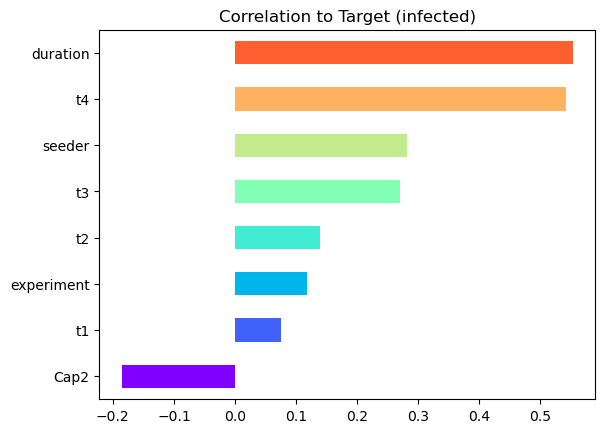


 duration      0.553150
t4            0.542124
seeder        0.281031
t3            0.269805
t2            0.138569
experiment    0.118379
t1            0.074785
Cap2         -0.184884
dtype: float64


In [9]:
n_fts = len(df.columns)
colors = cm.rainbow(np.linspace(0, 1, n_fts))

df.drop('infected',axis=1).corrwith(df.infected).sort_values(ascending=True).plot(kind='barh', 
                                                                                     color=colors)
plt.title('Correlation to Target (infected)')
plt.show()

print('\n',df.drop('infected',axis=1).corrwith(df.infected).sort_values(ascending=False))

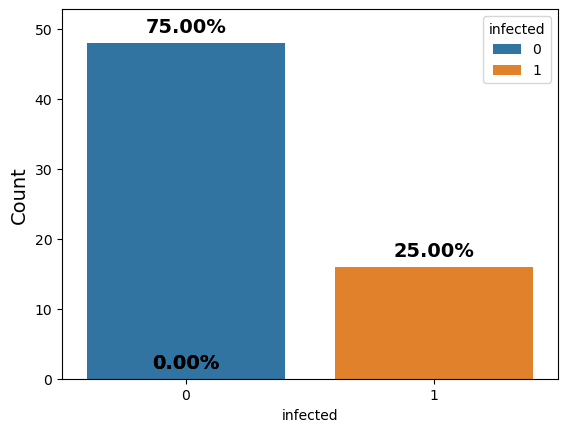

In [10]:
total = len(df)
plt.figure()
g = sns.countplot(x='infected', data=df, hue='infected')
g.set_ylabel('Count', fontsize=14)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 1.5,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14, fontweight='bold')
plt.margins(y=0.1)
plt.show()

In [13]:
X = df[['t1', 't2', 't3', 't4']]
y = df['infected']

In [14]:
X.head()

,t1,t2,t3,t4
0,2.783333,10.600000,23.483333,25.850000
1,4.500000,20.983333,23.216667,13.916667
2,6.200000,20.900000,27.200000,8.416667
3,17.016667,20.733333,15.933333,9.050000
4,0.183333,1.033333,9.700000,51.816667


In [85]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply resampling techniques
oversampler = SMOTE()
undersampler = RandomUnderSampler()
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_resampled, y_train_resampled)

print("Original dataset shape: ", X_train.shape)
print("Resampled dataset shape: ", X_train_resampled.shape)


Original dataset shape:  (51, 8)
Resampled dataset shape:  (74, 8)


# Logitic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# Predict probabilities
predicted_probs = model.predict_proba(X)[:, 1]

In [16]:
predicted_probs

array([0.0271057 , 0.02733898, 0.02652819, 0.02295097, 0.02778738,
       0.02720811, 0.03957593, 0.03771632, 0.03867486, 0.04265432,
       0.0407317 , 0.04128075, 0.20753733, 0.2221548 , 0.15901446,
       0.214777  , 0.16903445, 0.17320356, 0.03221179, 0.03157188,
       0.0340862 , 0.03290176, 0.03620379, 0.03187498, 0.56764367,
       0.61870993, 0.60078186, 0.6414295 , 0.54694703, 0.68350699,
       0.19102346, 0.19452299, 0.21332528, 0.23131438, 0.20065889,
       0.20196842, 0.2151735 , 0.21615048, 0.21228574, 0.15536037,
       0.2025016 , 0.73982447, 0.70688965, 0.37988087, 0.74378549,
       0.65259649, 0.16598792, 0.16119169, 0.1324175 , 0.15908955,
       0.16438193, 0.18141636, 0.58549466, 0.47114459, 0.71745547,
       0.70567579, 0.70878735, 0.68068922, 0.06274292, 0.04742233,
       0.05187772, 0.04160427, 0.04937322, 0.05283921])

In [ ]:
model.

In [36]:
# EExtract the coefficients and intercept
coefficients = model.coef_[0]
intercept = model.intercept_[0]

In [40]:
# Estimated coefficients
beta_1_ml, beta_2_ml, beta_3_ml, beta_4_ml = coefficients[0], coefficients[1], coefficients[2], coefficients[3]

# Intercept
beta_0_ml = intercept

print('Intercept: ', beta_0_ml, "\n")
print('Coefficient 1: ', beta_1_ml, "\n")
print('Coefficient 2: ', beta_2_ml, "\n")
print('Coefficient 3: ', beta_3_ml, "\n")
print('Coefficient 4: ', beta_4_ml)


Intercept:  -3.6461765972057743 

Coefficient 1:  -0.013405425809074853 

Coefficient 2:  0.004965173526324209 

Coefficient 3:  0.00033094218905139745 

Coefficient 4:  0.0016462064701024469


$$z_i = \beta_0 + \alpha_1\times t_1 + \alpha_2 \times t_2 + \alpha_3 \times t_3 + \alpha_4 \times t_4$$

In [17]:
# Adjust the threshold if needed
threshold = 0.5 # Adjust the threshold as per your needs
y_pred_adjusted = (predicted_probs > threshold).astype(int)

# Evaluate the model
print(classification_report(y, y_pred_adjusted))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        48
           1       0.67      0.62      0.65        16

    accuracy                           0.83        64
   macro avg       0.77      0.76      0.77        64
weighted avg       0.82      0.83      0.83        64



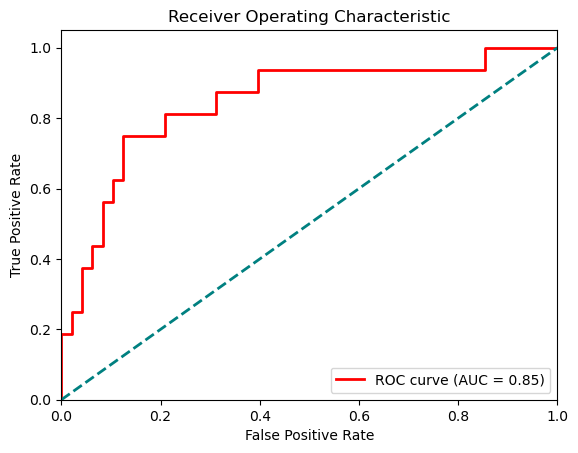

In [18]:
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt

# Compute the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y, predicted_probs)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='teal', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

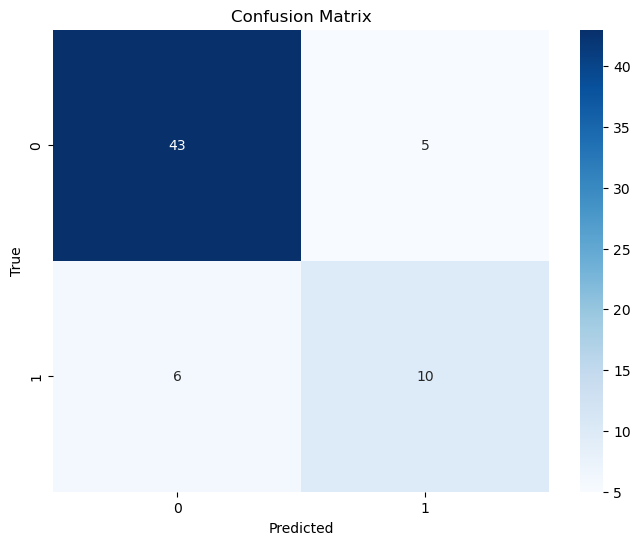

In [19]:
import numpy as np
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

# Convert predicted probabilities to predicted labels
y_pred = np.where(predicted_probs >= 0.5, 1, 0)

# Compute confusion matrix
cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [20]:
import numpy as np

# Number of simulations
num_simulations = 1000

# Initialize an array to store the aggregated results
draws = []
# Perform the simulation for each row
for i, prob in enumerate(predicted_probs):
    # Perform binomial draws
    draws.append(np.random.binomial(1, prob, num_simulations))
    # Store the results in the aggregated array

draws = pd.DataFrame(draws)
draws


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
61,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
62,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [21]:
draws.columns = draws.add_prefix('prob_').columns

In [22]:
concatenated_cols = pd.concat([df["experiment"], df["duration"], df["infected"]], axis=1)
p_list_df_concat = pd.concat([concatenated_cols, draws], axis=1)

p_list_df_concat = p_list_df_concat.reset_index().drop(columns='index')

p_list_df_concat

,experiment,duration,infected,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,...,prob_990,prob_991,prob_992,prob_993,prob_994,prob_995,prob_996,prob_997,prob_998,prob_999
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,6,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60,6,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61,6,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
62,6,8,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [30]:
# Convert the first two columns to numerical values
p_list_df_concat['experiment'] = pd.to_numeric(df['experiment'])
p_list_df_concat['duration'] = pd.to_numeric(df['duration'])
p_list_df_concat['infected'] = pd.to_numeric(df['infected'])

In [31]:
p_list_df_concat

,experiment,duration,infected,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,...,prob_990,prob_991,prob_992,prob_993,prob_994,prob_995,prob_996,prob_997,prob_998,prob_999
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,6,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60,6,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61,6,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
62,6,8,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [32]:
cases_per_exp = p_list_df_concat.groupby(['experiment', 'duration']).sum().reset_index()

In [33]:
cases_per_exp

,experiment,duration,infected,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,...,prob_990,prob_991,prob_992,prob_993,prob_994,prob_995,prob_996,prob_997,prob_998,prob_999
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,1,6,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,2,0,1,0
2,1,24,0,2,0,2,3,1,1,1,...,1,2,1,1,2,1,1,2,2,2
3,2,24,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,2,44,4,3,6,4,4,4,2,4,...,3,4,4,4,3,4,3,5,2,2
5,3,24,3,1,2,2,1,1,1,0,...,1,1,1,2,2,2,0,0,1,2
6,4,24,0,2,1,1,0,2,1,1,...,1,1,0,1,0,2,2,2,2,1
7,4,48,4,3,3,4,3,0,3,2,...,2,4,3,5,3,4,5,2,5,2
8,5,24,1,0,2,2,1,1,1,1,...,0,1,1,2,1,1,2,1,2,0
9,5,48,3,4,4,3,2,6,3,6,...,5,4,5,4,4,2,3,4,3,2


In [34]:
N = [6, 6, 6 , 6, 6, 5, 6,5, 6, 6, 6]

cases_per_exp.insert(2, 'N', N)

cases_per_exp = cases_per_exp.rename(columns={'infected': 'positives'})

cases_per_exp.to_csv('cases_per_experiment_logistic_ML_0.5.csv', index=False)

In [35]:
cases_per_exp.to_csv('cases_per_experiment_logistic_ML_time_only.csv', index=False)